## Yolo 적용을 위한 파이썬과 딥러닝 이해
# 이미지 증대 (augentation)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### cifar-10 데이터 불러오기
- http://www.cs.toronto.edu/~kriz/cifar.html
- cifar-10-python.tar.gz

In [2]:
import pickle

X_train = None
y_train = []

for i in range(1,6):
    f = open('../프로그래밍/keras_new/cifar10/data_batch_'+str(i), 'rb')
    dict = pickle.load(f, encoding='bytes') # [b'batch_label', b'labels', b'data', b'filenames']
    f.close()
    
    X_now = dict[b'data']
    if i==1:
        X_train = X_now
    else:
        X_train = np.r_[X_train, X_now]
        
    y_train += dict[b'labels']

In [3]:
X_train.shape, len(y_train)

((50000, 3072), 50000)

- 3072 개의 값은 R채널, G채널, B채널 순으로 되어 있다. 즉 (3,32,32) 형태이다.
- np.moveaxis() 를 이용해 1번 축을 마지막으로 보내야 한다.

In [4]:
X_train = np.moveaxis(X_train.reshape(-1,3,32,32), 1, -1)

Text(0.5,1,'6')

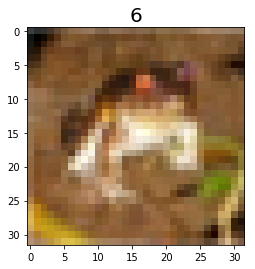

In [5]:
plt.imshow(X_train[0])
plt.title(y_train[0], fontsize=20)

In [6]:
X_train[0].dtype, X_train[0].max()

(dtype('uint8'), 255)

In [7]:
y_train[:10]

[6, 9, 9, 4, 1, 1, 2, 7, 8, 3]

### 테스트 데이터 불러오기

In [8]:
import pickle

f = open('../프로그래밍/keras_new/cifar10/test_batch', 'rb')
dict = pickle.load(f, encoding='bytes') # [b'batch_label', b'labels', b'data', b'filenames']
f.close()

X_test = dict[b'data']
y_test = dict[b'labels']

In [9]:
X_test.shape, len(y_test)

((10000, 3072), 10000)

In [10]:
X_test = np.moveaxis(X_test.reshape(-1,3,32,32), 1, -1)

### 사진 레이블 알아내기

In [11]:
f = open('../프로그래밍/keras_new/cifar10/batches.meta', 'rb')
dict = pickle.load(f, encoding='bytes') # [b'batch_label', b'labels', b'data', b'filenames']
f.close()

dict.keys()

dict_keys([b'num_cases_per_batch', b'label_names', b'num_vis'])

In [12]:
dict[b'label_names']

[b'airplane',
 b'automobile',
 b'bird',
 b'cat',
 b'deer',
 b'dog',
 b'frog',
 b'horse',
 b'ship',
 b'truck']

In [13]:
labels = [b.decode() for b in dict[b'label_names']]
labels

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

### 데이터 정리
- X_train, y_train
- X_test, y_test
- labels

In [14]:
from keras.utils import np_utils

C:\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [15]:
X_train = X_train/255.

In [16]:
y_train = np_utils.to_categorical(y_train, 10)

In [17]:
X_test = X_test/255.

In [18]:
y_test = np_utils.to_categorical(y_test, 10)

In [19]:
labels = np.array(labels)

- 데이터 확인

In [20]:
X_train.shape, X_train[0].max()

((50000, 32, 32, 3), 1.0)

In [21]:
y_train.shape

(50000, 10)

In [22]:
X_test.shape, X_test[0].max()

((10000, 32, 32, 3), 1.0)

In [23]:
y_test.shape

(10000, 10)

In [24]:
labels.shape

(10,)

### 이미지 증대

In [25]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [26]:
images = X_train[:10]
images.shape

(10, 32, 32, 3)

In [31]:
for x, y in datagen.flow(images, y_train[:10], batch_size=2):
    print(type(x), len(x))
    break

<class 'numpy.ndarray'> 2


In [32]:
display(x[0].shape, x[1].shape, y)

(32, 32, 3)

(32, 32, 3)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [33]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [34]:
n = 0
images_aug = []
ys = []

for x, y in datagen.flow(images, y_train[:10], batch_size=2): # shuffle=True
    print(x.shape) # x -> (2,32,32,3)
    images_aug.append(x[0])
    images_aug.append(x[1])
    ys.append(y[0])
    ys.append(y[1])
    
    n += 1
    if n>=10: break
        
display(len(images_aug), images_aug[0].shape)

(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)
(2, 32, 32, 3)


20

(32, 32, 3)

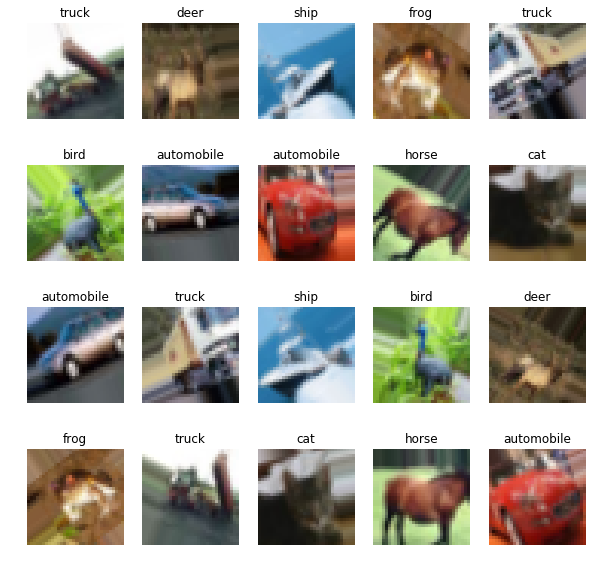

In [35]:
plt.figure(figsize=[10,10])

for i in range(20):
    plt.subplot(4,5,i+1)
    plt.imshow(images_aug[i])
    plt.axis('off')
    plt.title(labels[np.argmax(ys[i])])

In [36]:
help(ImageDataGenerator)

Help on class ImageDataGenerator in module keras.preprocessing.image:

class ImageDataGenerator(keras_preprocessing.image.ImageDataGenerator)
 |  Generate batches of tensor image data with real-time data augmentation.
 |   The data will be looped over (in batches).
 |  
 |  # Arguments
 |      featurewise_center: Boolean.
 |          Set input mean to 0 over the dataset, feature-wise.
 |      samplewise_center: Boolean. Set each sample mean to 0.
 |      featurewise_std_normalization: Boolean.
 |          Divide inputs by std of the dataset, feature-wise.
 |      samplewise_std_normalization: Boolean. Divide each input by its std.
 |      zca_epsilon: epsilon for ZCA whitening. Default is 1e-6.
 |      zca_whitening: Boolean. Apply ZCA whitening.
 |      rotation_range: Int. Degree range for random rotations.
 |      width_shift_range: Float, 1-D array-like or int
 |          - float: fraction of total width, if < 1, or pixels if >= 1.
 |          - 1-D array-like: random elements from

### Keras 적용

In [37]:
from keras.models import Sequential
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, Dense

In [38]:
model = Sequential()

model.add(Conv2D(32, (3,3), padding='same', input_shape=(32,32,3), activation='relu'))
model.add(Conv2D(32, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(Conv2D(64, (3,3), padding='same', activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 16, 16, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
__________

In [40]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True,
                             fill_mode='nearest')

In [41]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['acc'])

In [42]:
history = model.fit_generator(datagen.flow(X_train, y_train, batch_size=100),
                              steps_per_epoch=500, # 50000/batch_size
                              epochs=10,
                              validation_data=(X_test, y_test))

Epoch 1/10
500/500 [==============================] - 1911s 4s/step - loss: 1.9359 - acc: 0.2924 - val_loss: 1.9675 - val_acc: 0.2871
Epoch 2/10
500/500 [==============================] - 2164s 4s/step - loss: 1.6529 - acc: 0.3992 - val_loss: 1.5671 - val_acc: 0.4499
Epoch 3/10
500/500 [==============================] - 2421s 5s/step - loss: 1.5162 - acc: 0.4550 - val_loss: 1.2421 - val_acc: 0.5514
Epoch 4/10
500/500 [==============================] - 2333s 5s/step - loss: 1.4391 - acc: 0.4844 - val_loss: 1.2810 - val_acc: 0.5437
Epoch 5/10
500/500 [==============================] - 2331s 5s/step - loss: 1.3773 - acc: 0.5095 - val_loss: 1.2829 - val_acc: 0.5581
Epoch 6/10
500/500 [==============================] - 2438s 5s/step - loss: 1.3348 - acc: 0.5232 - val_loss: 1.1307 - val_acc: 0.5990
Epoch 7/10
500/500 [==============================] - 1956s 4s/step - loss: 1.3038 - acc: 0.5382 - val_loss: 1.2167 - val_acc: 0.5794
Epoch 8/10
500/500 [==============================] - 1455s 3s

- 10번 더 훈련한다.

In [45]:
hh1 = history.history.copy()

In [46]:
history2 = model.fit_generator(datagen.flow(X_train, y_train, batch_size=100),
                              steps_per_epoch=500, # 50000/batch_size
                              epochs=10,
                              validation_data=(X_test, y_test))

Epoch 1/10
500/500 [==============================] - 1244s 2s/step - loss: 1.2337 - acc: 0.5683 - val_loss: 1.2019 - val_acc: 0.6110
Epoch 2/10
500/500 [==============================] - 1230s 2s/step - loss: 1.2295 - acc: 0.5745 - val_loss: 1.1602 - val_acc: 0.6194
Epoch 3/10
500/500 [==============================] - 1231s 2s/step - loss: 1.2282 - acc: 0.5728 - val_loss: 1.3038 - val_acc: 0.5913
Epoch 4/10
500/500 [==============================] - 1267s 3s/step - loss: 1.2122 - acc: 0.5784 - val_loss: 1.3998 - val_acc: 0.5415
Epoch 5/10
500/500 [==============================] - 1234s 2s/step - loss: 1.2109 - acc: 0.5809 - val_loss: 1.0895 - val_acc: 0.6455
Epoch 6/10
500/500 [==============================] - 1229s 2s/step - loss: 1.2157 - acc: 0.5779 - val_loss: 1.0513 - val_acc: 0.6576
Epoch 7/10
500/500 [==============================] - 1250s 2s/step - loss: 1.2179 - acc: 0.5793 - val_loss: 1.0027 - val_acc: 0.6661
Epoch 8/10
500/500 [==============================] - 1229s 2s

In [47]:
hh2 = history2.history.copy()

In [48]:
history3 = model.fit_generator(datagen.flow(X_train, y_train, batch_size=100),
                              steps_per_epoch=500, # 50000/batch_size
                              epochs=20,
                              validation_data=(X_test, y_test))

Epoch 1/20
500/500 [==============================] - 1223s 2s/step - loss: 1.2199 - acc: 0.5822 - val_loss: 1.0458 - val_acc: 0.6453
Epoch 2/20
500/500 [==============================] - 1211s 2s/step - loss: 1.2224 - acc: 0.5780 - val_loss: 1.1201 - val_acc: 0.6258
Epoch 3/20
500/500 [==============================] - 1216s 2s/step - loss: 1.2231 - acc: 0.5782 - val_loss: 1.0255 - val_acc: 0.6493
Epoch 4/20
500/500 [==============================] - 1209s 2s/step - loss: 1.2353 - acc: 0.5740 - val_loss: 1.1418 - val_acc: 0.6197
Epoch 5/20
500/500 [==============================] - 1214s 2s/step - loss: 1.2431 - acc: 0.5761 - val_loss: 1.3835 - val_acc: 0.5942
Epoch 6/20
500/500 [==============================] - 1217s 2s/step - loss: 1.2334 - acc: 0.5776 - val_loss: 1.0394 - val_acc: 0.6621
Epoch 7/20
500/500 [==============================] - 1210s 2s/step - loss: 1.2447 - acc: 0.5738 - val_loss: 1.0722 - val_acc: 0.6488
Epoch 8/20
500/500 [==============================] - 1211s 2s

- 모두 합쳐 40 에포크 만큼 훈련시킴
- 사진이 변형되고 층수가 많아진 만큼 더 많은 에포크가 필요하겠다.
- 훈련시간이 길어 GPU 와 큰 메모리가 필요하다.

In [55]:
hh3 = history3.history.copy()

In [56]:
final_h = hh1.copy()
for key in final_h:
    final_h[key] += hh2[key] + hh3[key]

In [57]:
len(final_h['val_acc'])

40

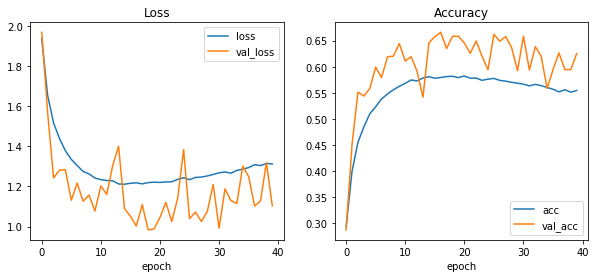

In [58]:
plt.figure(figsize=[10,4])

plt.subplot(1,2,1)
plt.plot(final_h['loss'])
plt.plot(final_h['val_loss'])
plt.title('Loss')
plt.xlabel('epoch')
plt.legend(['loss','val_loss'])

plt.subplot(1,2,2)
plt.plot(final_h['acc'])
plt.plot(final_h['val_acc'])
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend(['acc','val_acc'])

### 모델 저장하고 불러오기

In [49]:
model.save('cifar10_model_2.h5')

# from keras.model import load_model
# keras.models.load_model('cifar10_model_2.h5')

In [ ]:
#open('cifar10_architecture_2.json', 'w').write(model.to_json()) # keras.models.model_from_json()
#model.save_weights('cifar10_weights_2.h5', overwrite=True) # model.load_weights()

- 구조와 가중치 따로 저장 (https://3months.tistory.com/150)

```
model_json = model.to_json()
with open("model.json", "w") as json_file : 
    json_file.write(model_json)

model.save_weights("model.h5")
print("Saved model to disk")

from keras.models import model_from_json
json_file = open("model.json", "r")
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)

loaded_model.load_weights("model.h5")
print("Loaded model from disk")
```

- 전체 모델 저장

```
from keras.models import load_model
    
model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'
model = load_model('my_model.h5')
```